# 2-Class Bayesian Decision Theory

In [3]:
def bayesian_decision_verbose(P_x_given_w1, P_x_given_w2, P_w1, P_w2,
                              lambda11, lambda12, lambda21, lambda22):
    """
    Bayesian Decision Rule for 2-Class classification with detailed output.
    
    Returns:
        A dictionary with:
            - posterior probabilities
            - expected losses (conditional risks)
            - final decision
    """

    # Posterior probabilities using Bayes' theorem
    evidence = P_x_given_w1 * P_w1 + P_x_given_w2 * P_w2
    P_omega1_given_x = (P_x_given_w1 * P_w1) / evidence
    P_omega2_given_x = (P_x_given_w2 * P_w2) / evidence

    # Expected Loss (Conditional Risk) calculations
    R_alpha1 = lambda11 * P_omega1_given_x + lambda12 * P_omega2_given_x
    R_alpha2 = lambda21 * P_omega1_given_x + lambda22 * P_omega2_given_x

    # Decision
    decision = 1 if R_alpha1 < R_alpha2 else 2

    # Return all intermediate values for transparency
    return {
        "P(ω1|X)": round(P_omega1_given_x, 4),
        "P(ω2|X)": round(P_omega2_given_x, 4),
        "R(α1|X)": round(R_alpha1, 4),
        "R(α2|X)": round(R_alpha2, 4),
        "Decision": f"ω{decision}"
    }


In [4]:
# Example values
result = bayesian_decision_verbose(
    P_x_given_w1=0.7,
    P_x_given_w2=0.2,
    P_w1=0.4,
    P_w2=0.6,
    lambda11=0,
    lambda12=3,
    lambda21=10,
    lambda22=0
)

# Print all internal values
for key, value in result.items():
    print(f"{key}: {value}")


P(ω1|X): 0.7
P(ω2|X): 0.3
R(α1|X): 0.9
R(α2|X): 7.0
Decision: ω1


# Minimum Error Rate Classifier (MAP Rule)

In [6]:
def minimum_error_rate_classifier(posterior_probs):
    """
    Implements Minimum Error Rate Classification (MAP Rule)
    
    Parameters:
    - posterior_probs: dict or list of posterior probabilities for each class
                       e.g., { "class1": 0.6, "class2": 0.4 }

    Returns:
    - class_label: class with the highest posterior probability
    - all_info: dictionary containing posteriors and selected class
    """

    # Find the class with maximum posterior probability
    class_label = max(posterior_probs, key=posterior_probs.get)

    return class_label, {
        "Posteriors": posterior_probs,
        "Selected_Class": class_label
    }


In [7]:
# Example: Posterior probabilities for two classes
posterior = {
    "Spam": 0.3,
    "Not Spam": 0.7
}

decision, info = minimum_error_rate_classifier(posterior)

# Output decision and debug info
print(f"Predicted class: {decision}")
print("Detailed info:", info)


Predicted class: Not Spam
Detailed info: {'Posteriors': {'Spam': 0.3, 'Not Spam': 0.7}, 'Selected_Class': 'Not Spam'}


# Decision Regions with using MAP Rule with discriminant function

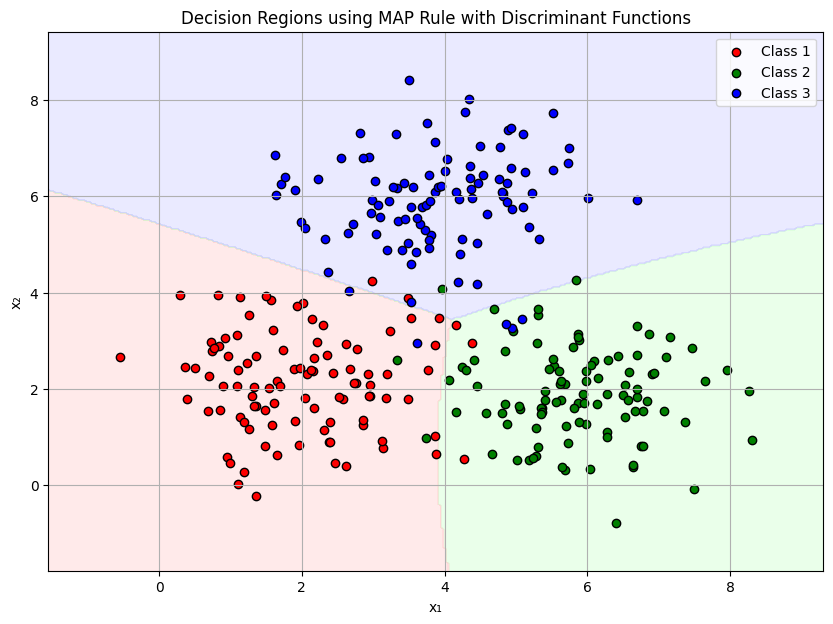

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB

# Step 1: Generate synthetic 2D data for 3 classes
np.random.seed(0)
N = 100
X1 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], N)
X2 = np.random.multivariate_normal([6, 2], [[1, 0], [0, 1]], N)
X3 = np.random.multivariate_normal([4, 6], [[1, 0], [0, 1]], N)

X = np.vstack([X1, X2, X3])
y = np.array([0]*N + [1]*N + [2]*N)  # class labels: 0,1,2

# Step 2: Fit Gaussian Naive Bayes (we use it for its posterior computation)
clf = GaussianNB()
clf.fit(X, y)

# Step 3: Create meshgrid for decision region visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

# Step 4: Predict class using MAP (argmax posterior)
Z = clf.predict(grid)
Z = Z.reshape(xx.shape)

# Step 5: Plot
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(['#FFCCCC', '#CCFFCC', '#CCCCFF'])
cmap_points = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_background)

# Plot data points
for i, color in enumerate(cmap_points):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=color, label=f'Class {i+1}', edgecolor='k')

plt.title("Decision Regions using MAP Rule with Discriminant Functions")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.grid(True)
plt.show()
